# Geodesic Example

First, we import the necessary modules.

In [1]:
%load_ext autoreload
%autoreload 2

from fadge.metric import KerrSchild
from fadge.geode  import Geode
from fadge.utils  import Nullify

from jax          import numpy as np
from matplotlib   import pyplot as plt

We then create the `metric` and `nullify` functions, and the initial condition of a null geodesic.

In [2]:
metric  = KerrSchild(0.999)
nullify = Nullify(metric)

s = []
for i in range(0,16):
    x =            np.array([0,1000,-i,4.8])
    v = nullify(x, np.array([1,   1, 0,0  ]))
    s.append(np.concatenate([x, v]))
s = np.array(s)

print(s.shape)

(16, 8)


Using these, we can create a geodesic precomputed from $\lambda = 0$ to $-200$.

In [3]:
geode = Geode(metric, 0, s, L=-1000)
geode.solve(-2000)

/Users/ckc/Library/Python/3.9/lib/python/site-packages/jax/experimental/maps.py:517: UserWarning: xmap is an experimental feature and probably has bugs!
  warn("xmap is an experimental feature and probably has bugs!")


We then pull the full DP5 step states, as well as creating interpolated data points.

In [4]:
l = np.linspace(0,-2000,20001)
f = geode.states
i = geode(l)
f.shape

(38, 16, 8)

Here's the result from the full domain.  Note that, thanks to adaptive time stepping, the step size far away from the black hole is large.

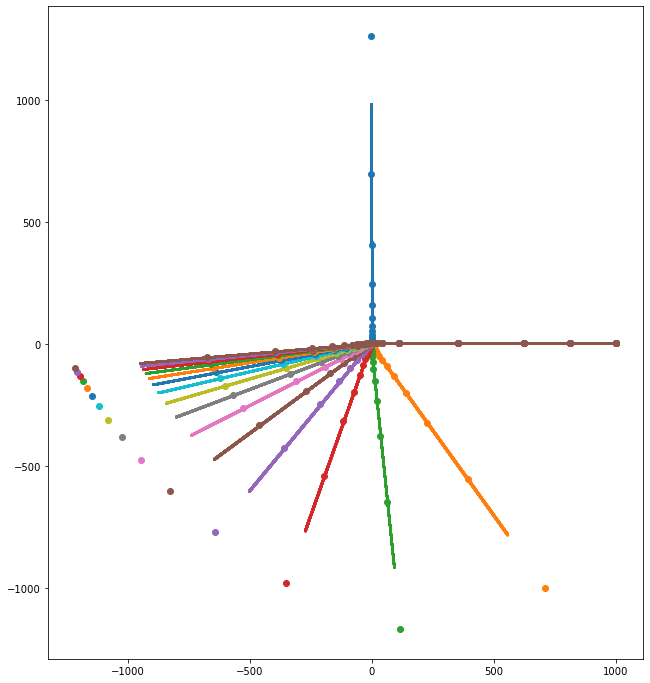

In [5]:
fig, ax = plt.subplots(1,1, figsize=(12,12))

for j in range(16):
    ax.scatter(f[:,j,1], f[:,j,3],      color=f'C{j}')
    ax.scatter(i[:,j,1], i[:,j,3], s=1, color=f'C{j}')
    
ax.set_aspect('equal')

Zoomed-in

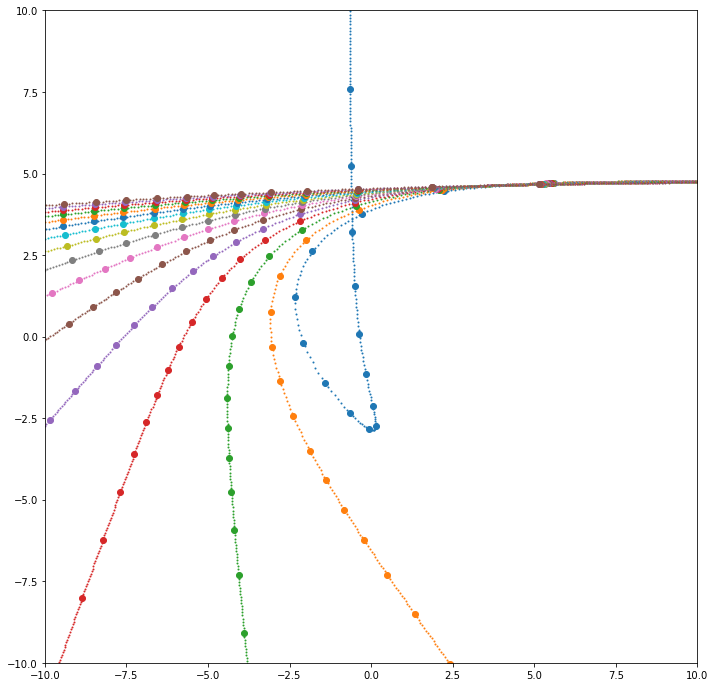

In [6]:
fig, ax = plt.subplots(1,1, figsize=(12,12))

for j in range(16):
    ax.scatter(f[:,j,1], f[:,j,3],      color=f'C{j}')
    ax.scatter(i[:,j,1], i[:,j,3], s=1, color=f'C{j}')
    
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_aspect('equal')